# JEDHA_Certification

#Projet Tinder#

Depuis la database fournie sur JULIE, nous allons mettre en évidence les caractéristiques prédominantes dans la recherche d'un partenaire et si d'autres paramètres peuvent entrer en compte.

In [1]:
#Importation des librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp

In [2]:
df = pd.read_csv("SpeedDatingData.csv", encoding="ISO-8859-1")

Travail préliminaire sur le dataframe

In [3]:
df.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [4]:
print("Number of rows : {}".format(df.shape[0]))
print()

print("Display of dataset: ")
display(df.head())
print()

print("Basics statistics: ")
data_desc = df.describe(include='all')
display(data_desc)
print()

print("Percentage of missing values: ")
display(100*df.isnull().sum()/df.shape[0])

Number of rows : 8378

Display of dataset: 


,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN



Basics statistics: 


,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,...,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,283.675937,8.960248,0.500597,17.327166,1.828837,11.350919,16.872046,9.042731,9.295775,8.927668,...,7.240312,8.093357,8.388777,7.658782,7.391545,6.810020,7.615079,7.932540,7.155258,7.048611
std,158.583367,5.491329,0.500029,10.940735,0.376673,5.995903,4.358458,5.514939,5.650199,5.477009,...,1.576596,1.610309,1.459094,1.744670,1.961417,1.507341,1.504551,1.340868,1.672787,1.717988
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,3.000000,2.000000,1.000000,2.000000,2.000000,4.000000,1.000000,1.000000
25%,154.000000,4.000000,0.000000,8.000000,2.000000,7.000000,14.000000,4.000000,4.000000,4.000000,...,7.000000,7.000000,8.000000,7.000000,6.000000,6.000000,7.000000,7.000000,6.000000,6.000000
50%,281.000000,8.000000,1.000000,16.000000,2.000000,11.000000,18.000000,8.000000,9.000000,8.000000,...,7.000000,8.000000,8.000000,8.000000,8.000000,7.000000,8.000000,8.000000,7.000000,7.000000
75%,407.000000,13.000000,1.000000,26.000000,2.000000,15.000000,20.000000,13.000000,14.000000,13.000000,...,8.000000,9.000000,9.000000,9.000000,9.000000,8.000000,9.000000,9.000000,8.000000,8.000000



Percentage of missing values: 


iid          0.000000
id           0.011936
gender       0.000000
idg          0.000000
condtn       0.000000
              ...    
attr5_3     75.936978
sinc5_3     75.936978
intel5_3    75.936978
fun5_3      75.936978
amb5_3      75.936978
Length: 195, dtype: float64

In [5]:
pd.set_option('display.max_columns', None)
print(df.columns.tolist())

['iid', 'id', 'gender', 'idg', 'condtn', 'wave', 'round', 'position', 'positin1', 'order', 'partner', 'pid', 'match', 'int_corr', 'samerace', 'age_o', 'race_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'dec_o', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'like_o', 'prob_o', 'met_o', 'age', 'field', 'field_cd', 'undergra', 'mn_sat', 'tuition', 'race', 'imprace', 'imprelig', 'from', 'zipcode', 'income', 'goal', 'date', 'go_out', 'career', 'career_c', 'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy', 'expnum', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1', 'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1', 'attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1', 'de

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Columns: 195 entries, iid to amb5_3
dtypes: float64(174), int64(13), object(8)
memory usage: 12.5+ MB


In [7]:
df1 = df.copy(deep = True)

In [8]:
#remplacement des valeurs 0 et 1 dans la colonne 'gender' par female et male
df1['gender'].replace([0,1], ['Female', 'Male'], inplace=True)

#remplacement des valeurs 0 et 1 dans la colonne 'match' par yes et no
df1['match'].replace([0,1], ['yes', 'no'], inplace=True)

#remplacement des valeurs 0 et 1 dans la colonne 'samerace' par yes et no
df1['samerace'].replace([0,1], ['yes', 'no'], inplace=True)

#remplacement des valeurs Black/African American, European/Caucasian-American, Latino/Hispanic American, Asian/Pacific Islander/Asian-American, Native American et autres dans la colonne race
race_code=[1, 2,3,4,5,6]
ethnie= ['Black/African American', 'European/Caucasian-American', 'Latino/Hispanic American', 'Asian/Pacific/Islander/Asian-American', 'Native American', 'Autre']
for i, j in zip(race_code, ethnie):
    df1['race'].replace([i], j, inplace=True)

#remplacement des valeurs 1 à 17 dans la colonne career
career_code = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
career = ['Lawyer', 'Academic/research', 'Psychologist', 'Doctor/Medecine', 'Engineer',
          'Creative Arts/Entertainment', 'Banking/Consulting/Finance/Marketing/Business/CEO/Entrepeneur/Admin',
          'Real Estate', 'International/Humanitarian Affairs', 'Undecided', 'Social Work', 'Speech Pathology',
          'Politics', 'Pro sports/Athletics', 'Others', 'Journalism', 'Architecture']

for i, j in zip(career_code, career):
    df1['career_c'].replace([i], j, inplace=True)

# 1- Comment sont réparties les informations dans notre dataset?

### 1.1 Répartition des genres

In [9]:
fig = px.histogram(df1, x = 'gender', text_auto =True)
fig.show()

### 1.2 Répartition des âges en fonction du genre

In [10]:
fig = sp.make_subplots(rows=1, cols=4, shared_yaxes=True)

fig.add_trace(
    go.Violin(x=df1[df1['gender'] == 'Female']['gender'], y=df1[df1['gender'] == 'Female']['age'], name='Female'),
    row=1, col=1
)

fig.add_trace(
    go.Box(x=df1[df1['gender'] == 'Female']['gender'], y=df1[df1['gender'] == 'Female']['age'], name='Female'),
    row=1, col=2
)

fig.add_trace(
    go.Violin(x=df1[df1['gender'] == 'Male']['gender'], y=df1[df1['gender'] == 'Male']['age'], name='Male'),
    row=1, col=3
)

fig.add_trace(
    go.Box(x=df1[df1['gender'] == 'Male']['gender'], y=df1[df1['gender'] == 'Male']['age'], name='Male'),
    row=1, col=4
)

fig.update_layout(width=1500, height=500,
                  title_text="Répartition des âges en fonction du genre",
                  xaxis=dict(title='Genre'),
                  yaxis=dict(title='Âge'))

fig.show()

Nous pouvons observer que les 2 groupes se répartissent de façon homogène. Le groupe des femmes a entre 19 et 35 ans, avec une moyenne d'âge de 26 ans. Le groupe des hommes, quant à lui, a entre 18 et 36 ans, avec une moyen d'âge de  27 ans.

### 1.3 Répartition des ethnies

In [11]:
fig = px.histogram(df1, x = 'race', color= 'gender', text_auto =True).update_xaxes(categoryorder= 'total descending')
fig.show()

### 1.4- Répartition des catégories socio-professionnelles

In [12]:
fig = px.histogram(df1, x = 'career_c', color= 'gender', text_auto =True).update_xaxes(categoryorder= 'total descending')
fig.show()

# 2- Quel est l'attribut le plus recherché selon le genre?

In [13]:
#Création d'un dataset pour chaque genre.
df_attr_gender = df1.groupby('gender')[['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']].mean()

df_attr_gender.reset_index(inplace=True)

df_attr_gender

,gender,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1
0,Female,18.055224,18.305008,21.002502,17.147292,12.827222,12.704194
1,Male,26.921689,16.498436,19.537374,17.763893,8.552829,10.996574


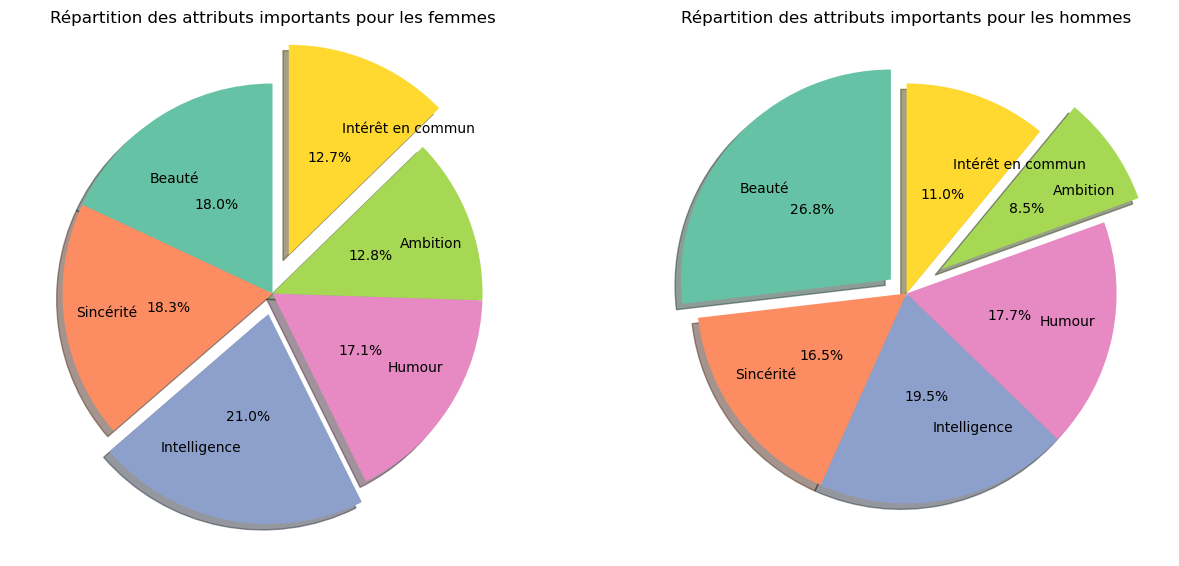

In [14]:
#Paramètres pour la création de Pie charts
labels = 'Beauté', 'Sincérité', 'Intelligence', 'Humour', 'Ambition', 'Intérêt en commun'

#Valeurs pour pie chart pour les femmes
genre_dataf = df_attr_gender.loc[df_attr_gender["gender"] == "Female"].values.flatten().tolist()
genre_dataf = [value for value in genre_dataf if value != "Female"]
explodef = (0, 0, 0.1 , 0, 0, 0.2)

#valeurs pour pie chart pour les hommes
genre_datah = df_attr_gender.loc[df_attr_gender["gender"] == "Male"].values.flatten().tolist()
genre_datah = [value for value in genre_datah if value != "Male"]
explodeh = (0.1, 0, 0, 0, 0.2, 0)

#Création de 2 pie charts
plt.figure(figsize=(15, 15))
#Pie Chart femme
plt.subplot(221)
plt.pie(genre_dataf , explode = explodef, labels= labels,
        colors= sns.color_palette('Set2'),
        labeldistance=0.65,
        pctdistance=0.5,
        autopct= '%1.1f%%', shadow= True, startangle= 90)

#titre
plt.title("Répartition des attributs importants pour les femmes")

#Pie Chart homme
plt.subplot(222)
plt.pie(genre_datah, explode = explodeh, labels= labels,
        colors= sns.color_palette('Set2'),
        labeldistance=0.65,
        pctdistance=0.5,
        autopct= '%1.1f%%', shadow= True, startangle= 90)

#titre
plt.title("Répartition des attributs importants pour les hommes")

plt.show()



Avec un total de **26.80%, la beauté** est ce qui attire le **plus** les hommes, a contrario, ce qui les attire le **moins** est l'**ambition avec 8.50%**.
En ce qui concerne les femmes, l'**intelligence**  les attire le **plus avec 21%** et ce qui les intéresse **moins** est d'avoir un intérêt commun, avec 12.70%

# 3- Les attributs les plus prépondérants, tels que la beauté chez les hommes et l'intelligence chez les femmes, sont-ils ceux qui favorisent le plus les matchs dans les speed-dating ?

### 3.1 L'importance de la beauté lors des rencontres

In [15]:
#Création d'un dataset pour chaque genre contenant la note des attributs après un date
df_attr_date = df1.groupby('gender')[['attr7_2', 'sinc7_2', 'intel7_2', 'fun7_2', 'amb7_2', 'shar7_2']].mean()

df_attr_date.reset_index(inplace=True)

df_attr_date

,gender,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2
0,Female,28.630964,15.263889,15.580331,18.426485,8.132937,13.779942
1,Male,37.314525,11.684266,14.986416,19.342738,6.386484,10.394931


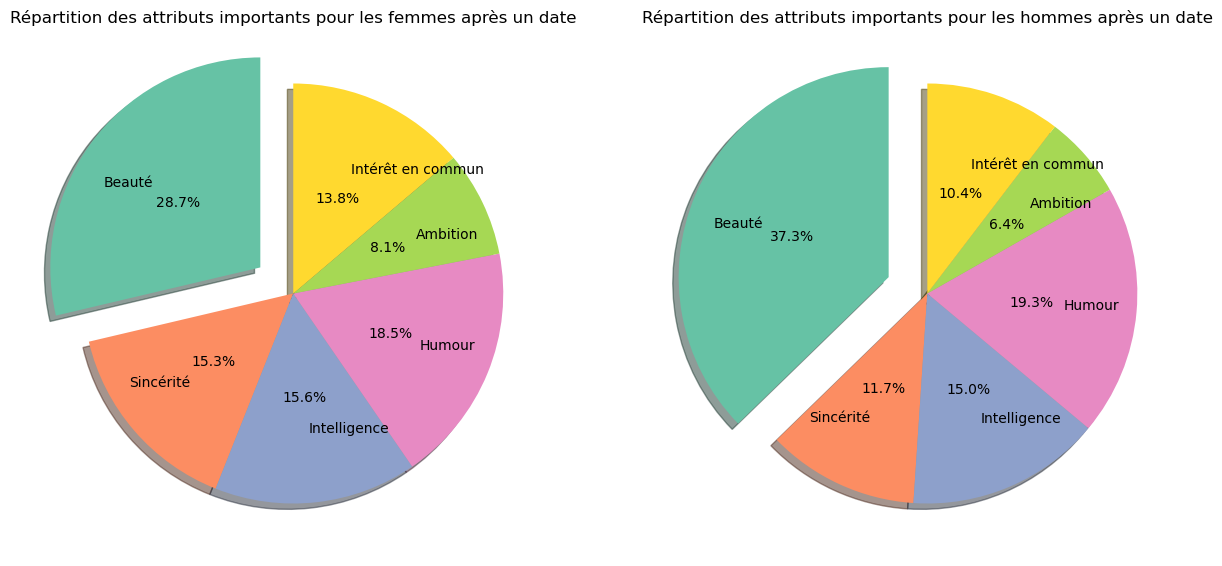

In [24]:
#Paramètres pour la création de Pie charts
labels = 'Beauté', 'Sincérité', 'Intelligence', 'Humour', 'Ambition', 'Intérêt en commun'

#Valeurs pour pie chart pour les femmes
genre_dataf = df_attr_date.loc[df_attr_date["gender"] == "Female"].values.flatten().tolist()
genre_dataf = [value for value in genre_dataf if value != "Female"]
explodef = (0.2, 0, 0 , 0, 0, 0)

#valeurs pour pie chart pour les hommes
genre_datah = df_attr_date.loc[df_attr_date["gender"] == "Male"].values.flatten().tolist()
genre_datah = [value for value in genre_datah if value != "Male"]
explodeh = (0.2, 0, 0, 0, 0, 0)

#Création de 2 pie charts
plt.figure(figsize=(15, 15))
#Pie Chart femme
plt.subplot(221)
plt.pie(genre_dataf , explode = explodef, labels= labels,
        colors= sns.color_palette('Set2'),
        labeldistance=0.65,
        pctdistance=0.5,
        autopct= '%1.1f%%', shadow= True, startangle= 90)

#titre
plt.title("Répartition des attributs importants pour les femmes après un date")

#Pie Chart homme
plt.subplot(222)
plt.pie(genre_datah, explode = explodeh, labels= labels,
        colors= sns.color_palette('Set2'),
        labeldistance=0.65,
        pctdistance=0.5,
        autopct= '%1.1f%%', shadow= True, startangle= 90)

#titre
plt.title("Répartition des attributs importants pour les hommes après un date")

plt.show()

Visiblement la beauté est l'**attibut le plus important** à la suite d'un date pour les **femmes, à 28,7%** et pour les hommes, à **37,3%**.

### 3.2 Lors d'un match

In [17]:
#Création d'un dataset pour chaque genre lorsqu'il y a un match.
df_attr_match = df1.groupby(['gender','match'])[['attr7_3', 'sinc7_3', 'intel7_3', 'fun7_3', 'amb7_3', 'shar7_3']].mean()

df_attr_match.reset_index(inplace=True)

df_attr_match

,gender,match,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3
0,Female,no,25.936275,17.887255,16.789216,15.725490,9.651961,14.254902
1,Female,yes,27.393407,18.129670,16.250549,15.174725,9.364835,13.642857
2,Male,no,38.427673,11.490566,17.138365,18.408805,4.308176,9.974843
3,Male,yes,36.114401,12.900404,17.076716,17.705249,6.187079,10.366083


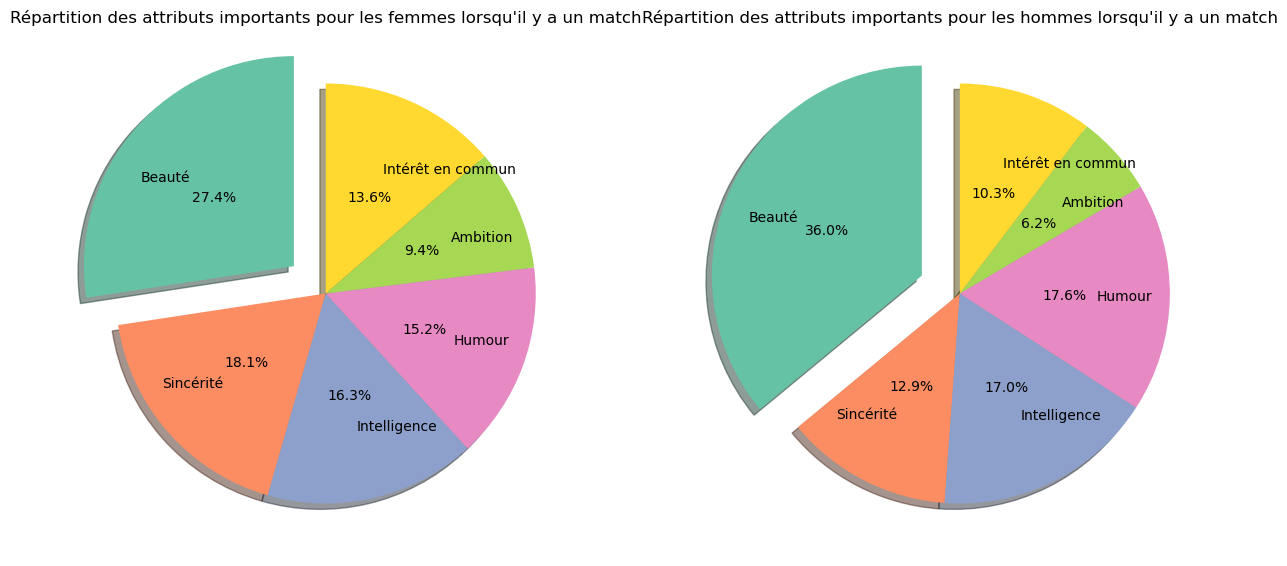

In [25]:
#Paramètres pour la création de Pie charts
labels = 'Beauté', 'Sincérité', 'Intelligence', 'Humour', 'Ambition', 'Intérêt en commun'

#Valeurs pour pie chart pour les femmes
genre_dataf = df_attr_match.loc[(df_attr_match["gender"] == "Female") & (df_attr_match["match"] == "yes")].values.flatten().tolist()
drop_list= ('Female', 'yes')
genre_dataf = [ele for ele in genre_dataf if ele not in drop_list]
#genre_dataf = [value for value in genre_dataf if value != "yes"]
explodef = (0.2, 0, 0 , 0, 0, 0)

#valeurs pour pie chart pour les hommes
genre_datah = df_attr_match.loc[(df_attr_match["gender"] == "Male") & (df_attr_match["match"] == "yes")].values.flatten().tolist()
drop_list= ('Male', 'yes')
genre_datah = [ele for ele in genre_datah if ele not in drop_list]
explodeh = (0.2, 0, 0, 0, 0, 0)

#Création de 2 pie charts
plt.figure(figsize=(15, 15))
#Pie Chart femme
plt.subplot(221)
plt.pie(genre_dataf , explode = explodef, labels= labels,
        colors= sns.color_palette('Set2'),
        labeldistance=0.65,
        pctdistance=0.5,
        autopct= '%1.1f%%', shadow= True, startangle= 90)

#titre
plt.title("Répartition des attributs importants pour les femmes lorsqu'il y a un match")

#Pie Chart homme
plt.subplot(222)
plt.pie(genre_datah, explode = explodeh, labels= labels,
        colors= sns.color_palette('Set2'),
        labeldistance=0.65,
        pctdistance=0.5,
        autopct= '%1.1f%%', shadow= True, startangle= 90)

#titre
plt.title("Répartition des attributs importants pour les hommes lorsqu'il y a un match")

plt.show()

Pour rappel, l'attribut le plus important lors d'une recherche pour une femme est l'intelligence à 21% et pour un homme, la beauté à 26,8%. Or, nous pouvons constater que l'attribut qui amène à **un match pour une femme est la beauté à 27.4%**. La beauté est devenu un attribut **encore plus important pour les hommes** avec **36.0%**.



# 4-Qu'en est-il concernant les ethnies?

### 4.1-Quel est l'attribut le plus important pour chaque ethnie?

In [19]:
#Création d'un dataset pour chaque genre et même groupe ethnique.
df_attr_genre_ethnie = df1.groupby(['race', 'gender'])[['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']].mean()
df_attr_genre_ethnie.reset_index(inplace=True)
df_attr_genre_ethnie.rename(columns={'attr1_1': 'Beauté', 'sinc1_1': 'Sincérité', 'intel1_1': 'Intelligence', 'fun1_1': 'Humour', 'amb1_1':'Ambition', 'shar1_1':'Intérêt_commun'}, inplace= True)

df_attr_genre_ethnie

,race,gender,Beauté,Sincérité,Intelligence,Humour,Ambition,Intérêt_commun
0,Asian/Pacific/Islander/Asian-American,Female,17.224268,19.439273,20.279321,16.390708,12.298967,14.368498
1,Asian/Pacific/Islander/Asian-American,Male,25.307535,19.002433,16.739861,16.659676,9.622136,13.088598
2,Autre,Female,19.609796,19.747347,20.646122,15.950612,10.694286,13.352245
3,Autre,Male,24.699206,17.791480,20.957545,18.937473,8.676823,8.576823
4,Black/African American,Female,19.758091,16.084232,18.281743,17.456846,16.025311,12.394191
5,Black/African American,Male,26.346369,17.882682,20.463687,16.955307,7.927374,9.474860
6,European/Caucasian-American,Female,17.892579,17.726481,21.402935,17.922268,12.961556,12.194445
7,European/Caucasian-American,Male,27.955135,15.327381,20.264587,18.231310,8.027331,10.406657
8,Latino/Hispanic American,Female,19.130769,18.960298,22.544417,15.438213,12.850868,10.850131
9,Latino/Hispanic American,Male,25.491762,16.494061,20.416667,16.481801,10.105939,12.851149


In [20]:
categories = ['Beauté', 'Sincérité', 'Intelligence', 'Humour', 'Ambition', 'Intérêt_commun']

asian_dataf = df_attr_genre_ethnie.loc[(df_attr_genre_ethnie["race"] == "Asian/Pacific/Islander/Asian-American") & (df_attr_genre_ethnie["gender"] == "Female"), categories].values.flatten().tolist()
asian_datah = df_attr_genre_ethnie.loc[(df_attr_genre_ethnie["race"] == "Asian/Pacific/Islander/Asian-American") & (df_attr_genre_ethnie["gender"] == "Male"), categories].values.flatten().tolist()

autre_dataf = df_attr_genre_ethnie.loc[(df_attr_genre_ethnie["race"] == "Autre") & (df_attr_genre_ethnie["gender"] == "Female"), categories].values.flatten().tolist()
autre_datah = df_attr_genre_ethnie.loc[(df_attr_genre_ethnie["race"] == "Autre") & (df_attr_genre_ethnie["gender"] == "Male"), categories].values.flatten().tolist()

black_dataf = df_attr_genre_ethnie.loc[(df_attr_genre_ethnie["race"] == "Black/African American") & (df_attr_genre_ethnie["gender"] == "Female"), categories].values.flatten().tolist()
black_datah = df_attr_genre_ethnie.loc[(df_attr_genre_ethnie["race"] == "Black/African American") & (df_attr_genre_ethnie["gender"] == "Male"), categories].values.flatten().tolist()

european_dataf = df_attr_genre_ethnie.loc[(df_attr_genre_ethnie["race"] == "European/Caucasian-American") & (df_attr_genre_ethnie["gender"] == "Female"), categories].values.flatten().tolist()
european_datah = df_attr_genre_ethnie.loc[(df_attr_genre_ethnie["race"] == "European/Caucasian-American") & (df_attr_genre_ethnie["gender"] == "Male"), categories].values.flatten().tolist()

latino_dataf = df_attr_genre_ethnie.loc[(df_attr_genre_ethnie["race"] == "Latino/Hispanic American") & (df_attr_genre_ethnie["gender"] == "Female"), categories].values.flatten().tolist()
latino_datah = df_attr_genre_ethnie.loc[(df_attr_genre_ethnie["race"] == "Latino/Hispanic American") & (df_attr_genre_ethnie["gender"] == "Male"), categories].values.flatten().tolist()

In [21]:
categories = ['Beauté', 'Sincérité', 'Intelligence', 'Humour', 'Ambition', 'Intérêt_commun']

color_female = '#ff7f0e'  
color_male = '#1f77b4'

titles = ["European", "Asian", "Latino", "Autre", "Black"]

fig = sp.make_subplots(rows=3, cols=2, specs=[[{'type': 'polar'}]*2]*3)

fig.add_trace(go.Scatterpolar(r=european_dataf, theta=categories, fill='toself', line_color=color_female, name='European_female'),1,1)
fig.add_trace(go.Scatterpolar(r=european_datah, theta=categories, fill='toself', line_color=color_male, name='European_male'),1,1)
fig.add_trace(go.Scatterpolar(r=asian_dataf, theta=categories, fill='toself', line_color=color_female, name='Asian_female'),1,2)
fig.add_trace(go.Scatterpolar(r=asian_datah, theta=categories, fill='toself', line_color=color_male, name='Asian_male'),1,2)
fig.add_trace(go.Scatterpolar(r=latino_dataf, theta=categories, fill='toself', line_color=color_female,name='Latino_female'),2,1)
fig.add_trace(go.Scatterpolar(r=latino_datah, theta=categories, fill='toself', line_color=color_male, name='Latino_male'),2,1)
fig.add_trace(go.Scatterpolar(r=autre_dataf, theta=categories, fill='toself', line_color=color_female, name='Autre_female'),2,2)
fig.add_trace(go.Scatterpolar(r=autre_datah, theta=categories, fill='toself', line_color=color_male, name='Autre_male'),2,2)
fig.add_trace(go.Scatterpolar(r=black_dataf, theta=categories, fill='toself', line_color=color_female, name='Black_female'),3,1)
fig.add_trace(go.Scatterpolar(r=black_datah, theta=categories, fill='toself', line_color=color_male, name='Back_male'),3,1)

fig.update_layout(width=1500, height=1000,
                  title_text="Répartition des attributs en fonction de l'ethnie",
                  polar=dict(radialaxis=dict(visible=True, showline=False, range=[0, 30])),
                  showlegend=True)

for i, title in enumerate(titles):
    fig.add_trace(go.Scatterpolar(r=[30], theta=[180*i/len(titles)], text=title, mode="text", showlegend=False, textfont=dict(size=16)), row=i//2+1, col=i%2+1)

fig.show()

La beauté reste le critère de prédilection dans le choix d'un partenaire, peu importe l'ethnie.
Nous allons chercher si l'ethnie a une importance dans le choix du partenaire.

### 4.2- L'ethnie est-il un critère lors d'un match?

In [26]:
fig = px.histogram(df1, x = 'match', color= 'samerace', text_auto =True, facet_row='samerace').update_xaxes(categoryorder= 'total descending')
fig.update_layout(title="Match entre personnes de même ethnie (yes) et entre personnes de différentes ethnies (non)",
                  legend_title_text="Ethnie")
fig.show()

Nous pouvons conclure que l'ethnie a une importance dans le choix du partenaire.

# 5-Avoir des avis communs sur les préférences amène-t-il à un match?

In [27]:
fig = px.histogram(df1, x = 'int_corr', color= 'match', text_auto =True, )
fig.update_layout(title="Match ou non lorsque les personnes ont des avis communs sur les préférences",
                  legend_title_text="Match")
fig.show() 

Au contraire de ce que l'on pourrait penser, avoir des avis communs sur les préférences avant le premier rendez-vous n'induit pas un match.

# 6-Conclusion

Dans le cadre de cette étude, nous avons entrepris une analyse approfondie des données relatives aux rencontres et aux préférences de partenaires lors de speed-dating.
Notre objectif était de mieux comprendre les tendances, les préférences et les corrélations au sein de cette population diversifiée.

Les participants couvrent un large éventail d'âges, avec une concentration particulière chez les jeunes adultes, ce qui est cohérent avec la nature du speed-dating.
Nous avons observé une répartition équilibrée des genres dans notre échantillon, avec des tendances différentes en ce qui concerne les préférences dans le choix d'un partenaire.
Préférences qui tendent à être identiques une fois les rencontres faites. Celles-ci sont renforcées lorsque la compatibilité (match) est confirmée.

Notre échantillon est diversifié sur le plan ethnique, et nous avons constaté que les préférences sont identiques peu importe l'ethnie.
Par contre, nous avons observé que la compatibilité (match) est plus faible lorsque l'ethnie est différente.
De plus, nous avons exploré le rôle de la corrélation des préférences avant le premier rendez-vous dans la formation des matchs, et nos résultats suggèrent que cette corrélation n'est pas un indicateur fort de la probabilité d'un match.

# 7-Axes de recherche supplémentaire

Compte tenu des capacités de mon ordinateur, je n'ai pas pu effectuer de matrice de corrélation pour vérifier si des paramètres étaient davantage corrélés entre eux. Cependant, cette analyse pourrait être une direction de recherche intéressante pour l'avenir afin de mieux comprendre les relations entre les différentes caractéristiques des participants et leur impact sur les résultats des rencontres.